In [68]:
import sys
if 'src' not in sys.path:
    sys.path.append('src')
from SimpleEC import *
from operators import *
from sklearn.metrics import mean_absolute_error

In [69]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.knr import KNNR, wsplit

### Cargamos dataset
El dataset contiene los precios de apertura y cierre del ETF VOO del 2 de enero del 2014 al 21 de octubre del 2022.



Otros datasets interesantes del S&P 500 y dowjons 

http://lib.stat.cmu.edu/datasets/djdc0093

http://lib.stat.cmu.edu/datasets/spdc2693

http://lib.stat.cmu.edu/datasets/

In [70]:
data = pd.read_csv('assets/VOO-ampm.csv')


<AxesSubplot:>

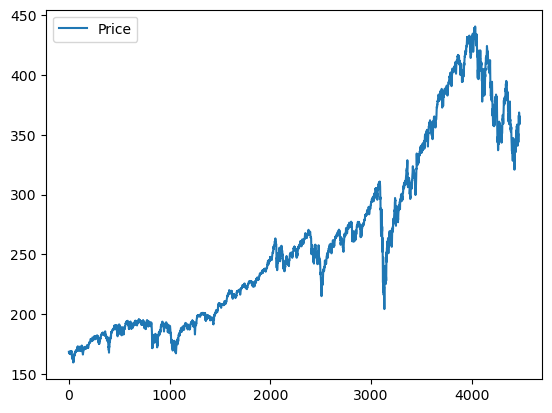

In [71]:
data.plot()

In [72]:
X,Y=wsplit(data.Price,10,1)
x=X[:-100]
y=Y[:-100]
xv=X[-100:-30]
yv=Y[-100:-30]
xt=X[-30:]
yt=Y[-30:]

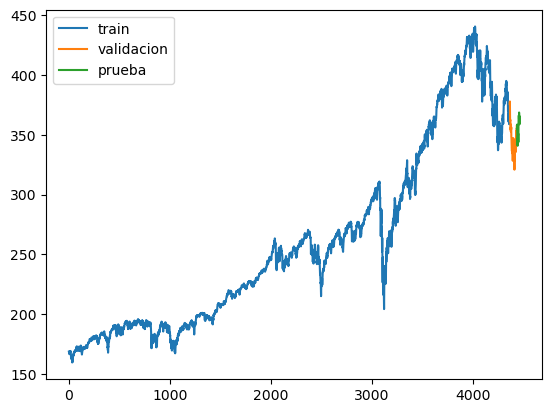

In [73]:
n=len(y)
nv=len(yv)
nt=len(yt)
plt.plot(range(0,n),y, label='train')
plt.plot(range(n,n+nv),yv, label='validacion')
plt.plot(range(n+nv,n+nv+nt),yt, label='prueba')
plt.legend(loc=0)

### Acercamiento a la etapa de validación y prueba.

Text(0, 0.5, 'USD')

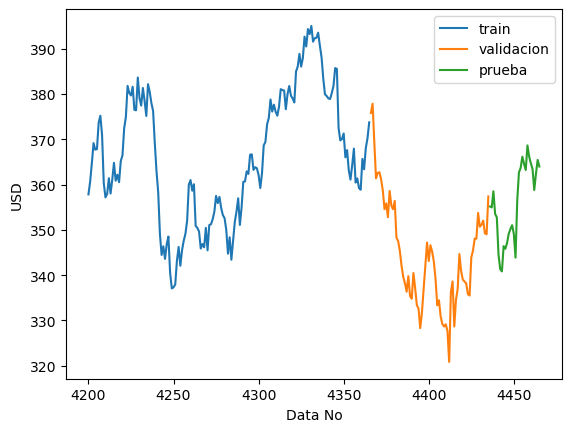

In [74]:
n=len(y)
nv=len(yv)
nt=len(yt)
plt.plot(range(4200,n),y[4200:], label='train')
plt.plot(range(n,n+nv),yv, label='validacion')
plt.plot(range(n+nv,n+nv+nt),yt, label='prueba')
plt.legend(loc=0)
plt.xlabel('Data No')
plt.ylabel('USD')


In [75]:
reg = Ridge()
reg.fit(x,y)
reg.score(xv,yv)

0.8601933197090434

In [76]:
yp=reg.predict(xv)
mean_absolute_error(yv,yp)

3.329188262764544

In [83]:
reg = Ridge(alpha=0)
reg.fit(x,y)
reg.score(xv,yv)

0.8601928437323814

3.329165214846354


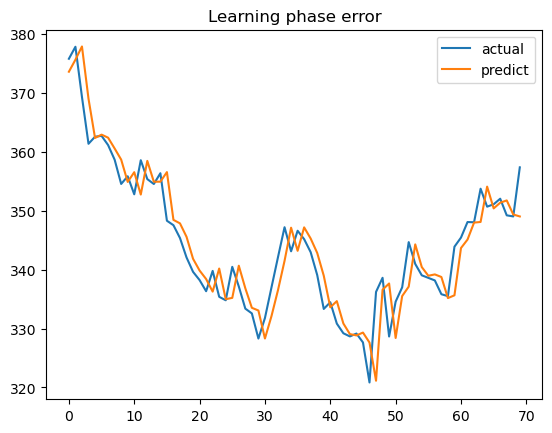

In [78]:
yp = reg.predict(xv)
print(mean_absolute_error(yv, yp))
plt.plot(yv, label='actual')
plt.plot(yp, label='predict')
plt.title("Learning phase error")
plt.legend()


0.7672952135193035
3.0581187893708335


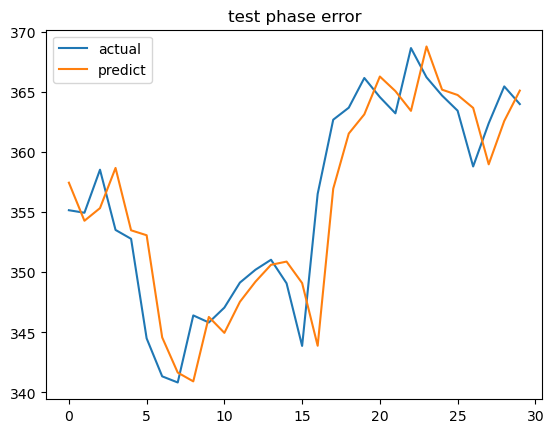

In [81]:
breg = reg.fit(X[:-30], Y[:-30])
mean_absolute_error(yt, reg.predict(xt))

print(reg.score(xt, yt))
yp1 = reg.predict(xt)
print(mean_absolute_error(yt, yp1))
plt.plot(yt, label='actual')
plt.plot(yp1, label='predict')
plt.title("test phase error")
plt.legend()
